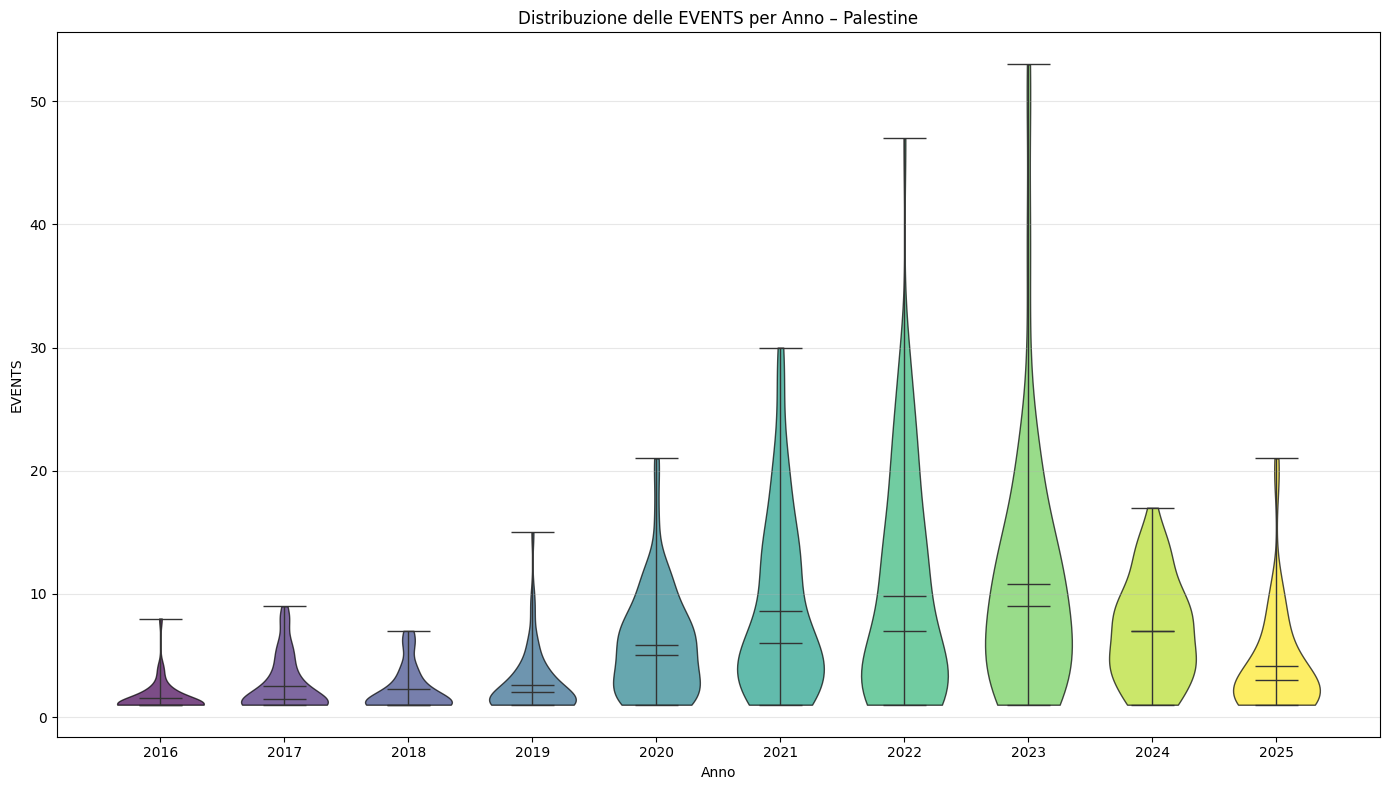

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leggi il file CSV e carica in un DataFrame
df = pd.read_csv('../datasets/mea_aggregated_data.csv', delimiter=',')

# Filtra Palestine (non altero df originale in modo distruttivo)
df_pal = df[df['COUNTRY'] == 'Palestine'].copy()


#df = df[df['YEAR'] == 2024]
df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Peaceful protest"]
#df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Violent demonstration"]



# Converte EVENTS a numerico
df_pal['EVENTS'] = pd.to_numeric(df_pal['EVENTS'], errors='coerce')
df_pal = df_pal.dropna(subset=['EVENTS','YEAR'])


if df_pal.empty:
    print('Nessun dato per Palestine.')
else:
    # Ordina gli anni
    anni = sorted(df_pal['YEAR'].unique())
    data_by_year = []
    positions = []
    for i, year in enumerate(anni, start=1):
        vals = df_pal.loc[df_pal['YEAR'] == year, 'EVENTS'].values
        if len(vals) == 0:
            continue
        positions.append(i)
        data_by_year.append(vals)

    if not data_by_year:
        print('Nessun dato con EVENTS > 0 per gli anni disponibili.')
    else:
        fig, ax = plt.subplots(figsize=(14, 8))
        parts = ax.violinplot(data_by_year, positions=positions, widths=0.7,
                              showmeans=True, showmedians=True, showextrema=True)

        # Colori graduali per anno
        cmap = plt.cm.viridis
        for idx, body in enumerate(parts['bodies']):
            color = cmap(idx / max(1, len(parts['bodies']) - 1))
            body.set_facecolor(color)
            body.set_edgecolor('black')
            body.set_alpha(0.7)

        # Stile mediane / means se presenti
        for k in ['cmedians','cmeans','cbars','cmins','cmaxes']:
            if k in parts:
                parts[k].set_color('#333333')
                parts[k].set_linewidth(1)

        ax.set_xticks(positions)
        ax.set_xticklabels([str(a) for a in anni], rotation=0)
        ax.set_xlabel('Anno')
        ax.set_ylabel('EVENTS')
        ax.set_title('Distribuzione delle EVENTS per Anno – Palestine')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
df = df[["COUNTRY", "EVENT_TYPE", "SUB_EVENT_TYPE", "EVENTS", "FATALITIES", "YEAR"]]

df.to_csv("../datasets/mea_aggregated_data.csv", index=False)

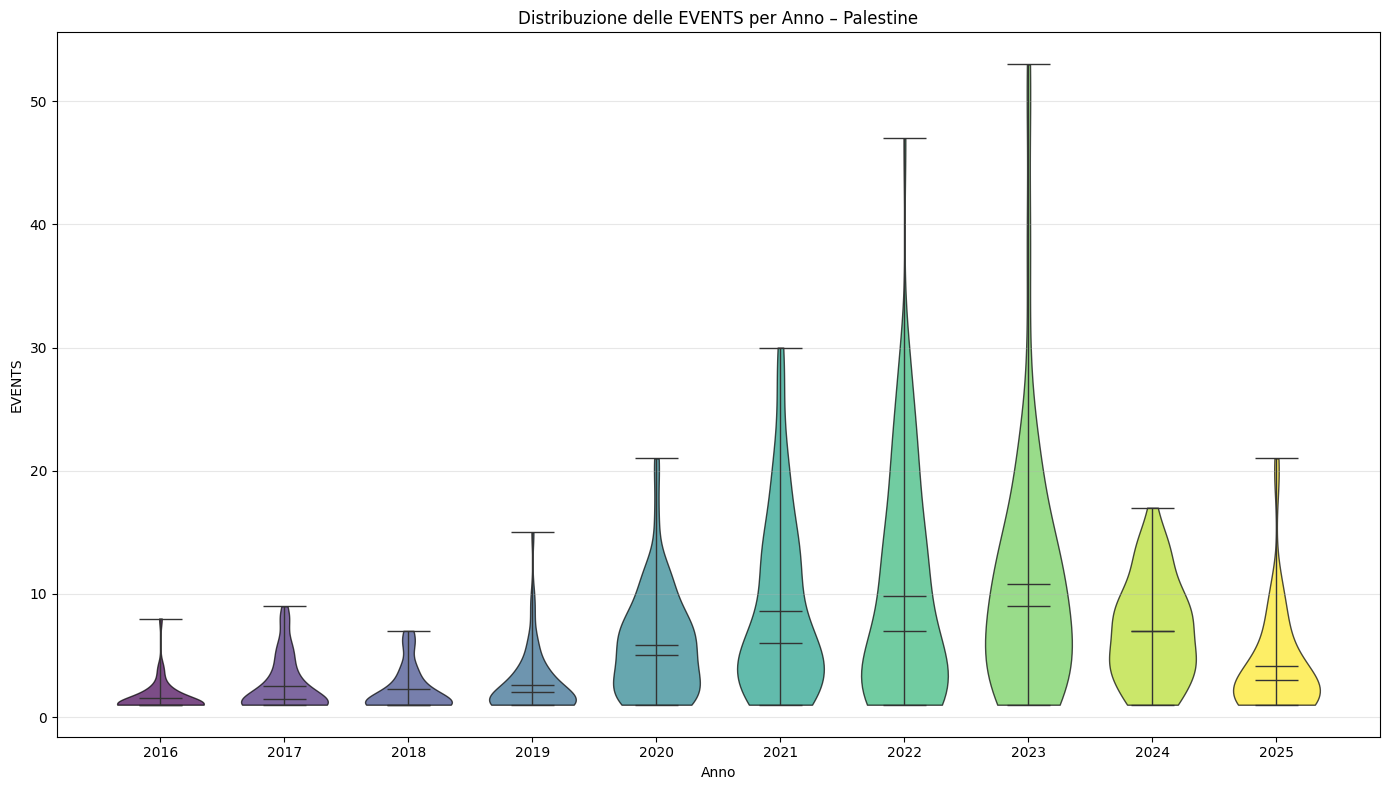

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Leggi il dataset ---
df = pd.read_csv('../raw_datasets/middle_east_aggregated_data.csv', sep=';', encoding='utf-8')

# --- Parsing della data (mesi italiani → inglesi) ---
mesi = {
    'gennaio': 'January', 'febbraio': 'February', 'marzo': 'March',
    'aprile': 'April', 'maggio': 'May', 'giugno': 'June',
    'luglio': 'July', 'agosto': 'August', 'settembre': 'September',
    'ottobre': 'October', 'novembre': 'November', 'dicembre': 'December'
}

# Converte i mesi italiani per estrarre l'anno
df['WEEK_EN'] = df['WEEK'].replace(mesi, regex=True)
df['WEEK_DATE'] = pd.to_datetime(df['WEEK_EN'], errors='coerce', format='%d-%B-%Y')
df['YEAR'] = df['WEEK_DATE'].dt.year

# Filtra Palestine (non altero df originale in modo distruttivo)
df_pal = df[df['COUNTRY'] == 'Palestine'].copy()


#df = df[df['YEAR'] == 2024]
df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Peaceful protest"]
#df_pal = df_pal[df_pal["SUB_EVENT_TYPE"] == "Violent demonstration"]



# Converte EVENTS a numerico
df_pal['EVENTS'] = pd.to_numeric(df_pal['EVENTS'], errors='coerce')
df_pal = df_pal.dropna(subset=['EVENTS','YEAR'])

if df_pal.empty:
    print('Nessun dato per Palestine.')
else:
    # Ordina gli anni
    anni = sorted(df_pal['YEAR'].unique())
    data_by_year = []
    positions = []
    for i, year in enumerate(anni, start=1):
        vals = df_pal.loc[df_pal['YEAR'] == year, 'EVENTS'].values
        if len(vals) == 0:
            continue
        positions.append(i)
        data_by_year.append(vals)

    if not data_by_year:
        print('Nessun dato con EVENTS > 0 per gli anni disponibili.')
    else:
        fig, ax = plt.subplots(figsize=(14, 8))
        parts = ax.violinplot(data_by_year, positions=positions, widths=0.7,
                              showmeans=True, showmedians=True, showextrema=True)

        # Colori graduali per anno
        cmap = plt.cm.viridis
        for idx, body in enumerate(parts['bodies']):
            color = cmap(idx / max(1, len(parts['bodies']) - 1))
            body.set_facecolor(color)
            body.set_edgecolor('black')
            body.set_alpha(0.7)

        # Stile mediane / means se presenti
        for k in ['cmedians','cmeans','cbars','cmins','cmaxes']:
            if k in parts:
                parts[k].set_color('#333333')
                parts[k].set_linewidth(1)

        ax.set_xticks(positions)
        ax.set_xticklabels([str(a) for a in anni], rotation=0)
        ax.set_xlabel('Anno')
        ax.set_ylabel('EVENTS')
        ax.set_title('Distribuzione delle EVENTS per Anno – Palestine')
        ax.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()